# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 16

First let's set things up for business. 

In [2]:
import sys
sys.path.insert(0,'/Users/ltauxe/Programs/PmagPy/GIT/PmagPy')  # change this to your PmagPy path
import ipmag,pmag
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt

## Problem 1a

Guessing from the chart downloaded in Chapter 15's problem sets, the mid Miocene is somthing like 15 Ma.  We need to use the program apwp.py to calculated the expected direction for the Mojave Desert (34.5N,117W).  So let's remind ourselves about how apwp.py works.  

In [1]:
!apwp.py -h


    NAME
        apwp.py

    DESCRIPTION
        returns predicted paleolatitudes, directions and pole latitude/longitude
        from apparent polar wander paths of Besse and Courtillot (2002).

    SYNTAX
        apwp.py [command line options][< filename]

    OPTIONS
        -h prints help message and quits
        -i allows interactive data entry
        -f file: read plate, lat, lon, age data from file
        -F output_file: write output to output_file 
        -P [NA, SA, AF, IN, EU, AU, ANT, GL] plate
        -lat LAT specify present latitude (positive = North; negative=South)
        -lon LON specify present longitude (positive = East, negative=West)
        -age AGE specify Age in Ma

     Note:  must have all -P, -lat, -lon, -age or none.

     OUTPUT
        Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long. 

    


Oh yeah, now I remember.  and don't forget the minus sign on the longitude!

In [160]:
!apwp.py -lat 34.5 -lon -117.5 -age 20 -P NA 

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    20.0    34.7   349.2    54.1    81.1   156.7



In [162]:
ExpDec=349.2  # might as well keep these for later. 
ExpInc=54.1

## Problem 1b

I went to http://earthref.org/MagIC/search and clicked on the search button and found six studies with 15 poles.   I made a Project Directory called 'MojaveDesert'  and fired up QuickMagIC.py. I changed directories into the Project Directory and unpacked the downloaded file. 

In [12]:
!QuickMagIC.py

/Users/ltauxe/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:1312: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/ltauxe/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Problem 1c

We are asked to make an equal area plot of all the Miocene results, so we will have to read the data in, fish out the Miocene data and plot only those.  

I know by now (and also by reading the information on the MagIC database in the PmagPy cookbook (http://earthref.org/PmagPy/cookbook) and in the datamodel link on the MagIC website that the pmag\_results tables are tab delimited with column headers on the second line.  So, I'll read in the pmag\_results table into a Pandas DataFrame and wrangle that. 

In [127]:
file='Chapter_16/MojaveDesert/pmag_results.txt' # make a filename
alldata=pd.read_csv(file,sep='\t',header=1)
alldata.columns

Index([u'antipodal', u'average_age', u'average_age_high', u'average_age_low', u'average_age_sigma', u'average_age_unit', u'average_alpha95', u'average_dec', u'average_height', u'average_inc', u'average_int', u'average_int_n', u'average_int_nn', u'average_int_rel', u'average_int_rel_sigma', u'average_int_rel_sigma_perc', u'average_int_sigma', u'average_int_sigma_perc', u'average_k', u'average_lat', u'average_lat_sigma', u'average_lon', u'average_lon_sigma', u'average_n', u'average_nn', u'average_r', u'average_sigma', u'conglomerate_test', u'contact_test', u'data_type', u'er_analyst_mail_names', u'er_citation_names', u'er_fossil_names', u'er_location_names', u'er_mineral_names', u'er_sample_names', u'er_site_names', u'er_specimen_names', u'er_synthetic_names', u'eta_dec', u'eta_inc', u'eta_semi_angle', u'external_database_ids', u'external_database_names', u'fold_test', u'fold_test_significance', u'magic_experiment_names', u'magic_method_codes', u'magic_software_packages', u'model_lat', u

The next step is to fish out only the ages we want and stick all the decination, inclination, latitude and longitude data into one array.  First, there seem to be three keys having to do with age.   I want to look at what is in each of these.  

In [128]:
alldata.average_age

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: average_age, dtype: float64

Nothing there, so let's look at average_age_high.

In [129]:
alldata.average_age_high

0     21
1     27
2     24
3     21
4     88
5     21
6     27
7     23
8     27
9     23
10    27
11    13
12    24
13    27
14    23
Name: average_age_high, dtype: int64

Bingo.  So now I can just fish out the data with ages less than 30 Ma.

In [130]:
mydata=alldata.ix[alldata.average_age_high<30]
mydata.average_age_high

0     21
1     27
2     24
3     21
5     21
6     27
7     23
8     27
9     23
10    27
11    13
12    24
13    27
14    23
Name: average_age_high, dtype: int64

I want to use  some of the nice ipmag functions to plot the directions.  

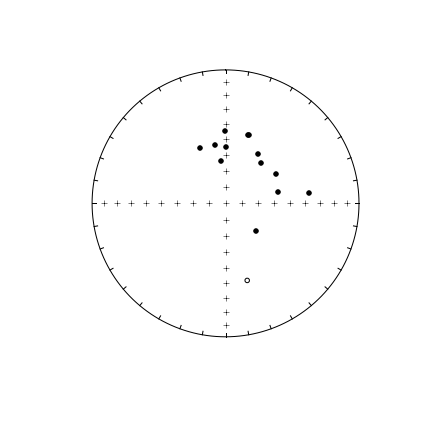

In [147]:
fig=plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(mydata.average_dec.values,mydata.average_inc.values)

These data do not look at all to be Fisher distributed.  They are streaked along a small circle. And there seems to be one reverse data point.   But oh well, I'll exclude the one reverse data point and calculate a mean and confidence ellipse, plot the expected direction and hold my nose. 

In [158]:
mydata.ix[mydata.average_inc>0,'polarity']='normal'
mydata.ix[mydata.average_inc<=0,'polarity']='reverse'
normals=mydata.loc[mydata.polarity=='normal']
mean=pmag.fisher_mean(np.array([normals.average_dec.values,normals.average_inc.values]).transpose())
print mean

{'csd': 24.672928963571263, 'k': 10.777762793929751, 'n': 13, 'r': 11.886596390230574, 'alpha95': 13.235198224545192, 'dec': 28.334270648952366, 'inc': 59.406173562807126}


Now I need to replot the data and decorate it with the mean, confidence ellipse and the expected direction, all in different colors.  

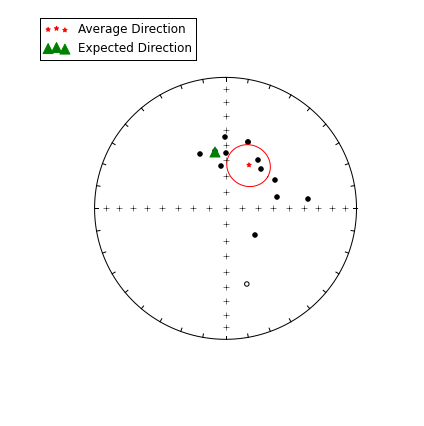

In [170]:
fig=plt.figure(num=2,figsize=(6,6))
ipmag.plot_net(2)
ipmag.plot_di(mydata.average_dec.values,mydata.average_inc.values)
ipmag.plot_di_mean(mean['dec'],mean['inc'],mean['alpha95'],\
                   color='r',marker='*',label='Average Direction',legend='yes')
ipmag.plot_di([ExpDec],[ExpInc],color='g',marker='^',markersize=100,label='Expected Direction',legend='yes')

In the Chapter, there is a discussion about 'displaced terranes'.  Perhaps the Mojave is one of those.  At least it appears to have undergone significant vertical axis rotation!  Or got hit by lightning or something...

## Problem 1d:

Now we ship the decs and incs to pmag.dia_vgp as we did in Chapter 2.  (At last we get to USE our knowledge).  

In [175]:
print pmag.dia_vgp.__doc__


    converts declination, inclination, alpha95 to VGP, dp, dm
    takes input as (Decs, Incs, a95, Site latitudes, Site Longitudes).  
    These can be lists or individual values.
    Returns longitude, latitude, dp, dm
    


In [188]:
Lons,Lats,dp,dm= pmag.dia_vgp(normals['average_dec'].values,normals['average_inc'].values,\
                   normals['average_alpha95'],normals['average_lat'].values,normals['average_lon'].values)
LonLats= np.array([Lons,Lats]).transpose()
print LonLats
print pmag.fisher_mean(LonLats)

[[ 147.2462747    81.52156794]
 [ 272.22476331    2.40449976]
 [ 354.8292564    71.9496455 ]
 [  65.17286274   80.74281849]
 [ 316.04882963   41.94446966]
 [ 153.01501476   69.16620267]
 [ 218.3124526    78.79392221]
 [ 303.80630829   29.12889758]
 [ 355.33110894   72.21756626]
 [ 318.24297298   17.01372178]
 [ 243.           89.26854385]
 [ 324.07422967   62.42775511]
 [ 316.66351306   56.47758698]]
{'csd': 34.158098397391434, 'k': 5.6231888254244771, 'n': 13, 'r': 10.865979540693415, 'alpha95': 19.211805135287786, 'dec': 308.35553651164474, 'inc': 67.029384929275196}


The putative paleopole for this data set is  308.3$^{\circ}$E, 67$^{\circ}$N.  

## Problem 2:

Site 522 was drilled on the African plate and ranged in age from 23 to 35 Ma (or so).  So I should use apwp.py to get directions at the site location (26$^{\circ}$S/5$^{\circ}$W). 

In [172]:
!apwp.py -lat -26 -lon -5 -age 33 -P AF

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    33.0   -35.6   353.7   -55.1    78.9   202.9



In [174]:
!apwp.py -lat -26 -lon -5 -age 23 -P AF

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    23.0   -33.3     0.1   -52.7    82.7   174.6



We'll have to read the data in (again - see solutions to Chapter 15), and calculation averages at the top and the bottom.

In [190]:
data=pd.read_csv("Chapter_15/pmag_results.txt", sep='\t',header=1)
MaxDepth=np.max(data['average_height'])
MinDepth=np.min(data['average_height'])
print MaxDepth,MinDepth

-55.23 -146.7


I want to take the top and bottom 10 meters.  

In [200]:
TopIncs=data.loc[data.average_height>-65].average_inc
BottomIncs=data.loc[data.average_height<-136].average_inc
print 'Top 10 m average inclination: ',pmag.doincfish(TopIncs)
print 'Bottom 10 m average inclination: ',pmag.doincfish(BottomIncs)

Top 10 m average inclination:  {'ginc': 50.44166666666662, 'k': 25.197630560984411, 'n': 276, 'r': 265.08627542044349, 'alpha95': 0.99944043396377436, 'csd': 16.136344856646417, 'inc': 51.971666666666522}
Bottom 10 m average inclination:  {'ginc': 54.795505617977511, 'k': 10.734558300844489, 'n': 267, 'r': 242.2202193564803, 'alpha95': 0.99597499543314838, 'csd': 24.722530955590354, 'inc': 59.685505617977213}


Wow.  These data (50 and 55 respectively) match really well with the Besse and Courtillot (2002) predictions of 53 and 55 respectively.   In fact, they used the Site 522 data to help make their APWPs! 

## Problem 3a:

I looked up in the Appendix and found the rotation pole for North America to South Africa at 90 Ma to be $\lambda$=74.6, $\phi$=-23, and $\Omega$  = 33.8.   And we were told the North American pole to rotate:  $\lambda=75.2^{\circ}, \phi=201^{\circ}$. 

In [321]:
Prot=[74.6,-23,33.8] # finite pole of rotation
plat,plon=75.2,201

Now for the subroutine.  I'm cheating a bit because I already wrote this and it is in the pmag module.  But since I wrote it, I can copy it here.  I also am using the function pmag.dir2cart because we did that already a million times.

In [331]:
def PTrot(EP,Lats,Lons):
    """ Does rotation of points on a globe  by finite rotations, 
    using method of Cox and Hart 1986, box 7-3. """
# gets user input of Rotation pole lat,long, omega for plate and converts to radians
    E=pmag.dir2cart([EP[1],EP[0],1.])
    omega=EP[2]*np.pi/180.
    RLats,RLons=[],[]
    for k in range(len(Lats)):
      if Lats[k]<=90.: # peel off delimiters
# converts to rotation pole to cartesian coordinates
        A=pmag.dir2cart([Lons[k],Lats[k],1.])
# defines cartesian coordinates of the pole A
        R=[[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]]
        R[0][0]=E[0]*E[0]*(1-np.cos(omega)) + np.cos(omega)
        R[0][1]=E[0]*E[1]*(1-np.cos(omega)) - E[2]*np.sin(omega)
        R[0][2]=E[0]*E[2]*(1-np.cos(omega)) + E[1]*np.sin(omega)
        R[1][0]=E[1]*E[0]*(1-np.cos(omega)) + E[2]*np.sin(omega)
        R[1][1]=E[1]*E[1]*(1-np.cos(omega)) + np.cos(omega)
        R[1][2]=E[1]*E[2]*(1-np.cos(omega)) - E[0]*np.sin(omega)
        R[2][0]=E[2]*E[0]*(1-np.cos(omega)) - E[1]*np.sin(omega)
        R[2][1]=E[2]*E[1]*(1-np.cos(omega)) + E[0]*np.sin(omega)
        R[2][2]=E[2]*E[2]*(1-np.cos(omega)) + np.cos(omega)
# sets up rotation matrix
        Ap=[0,0,0]
        for i in range(3):
            for j in range(3):
                Ap[i]+=R[i][j]*A[j]
# does the rotation
        Prot=pmag.cart2dir(Ap)
        RLats.append(Prot[1])
        RLons.append(Prot[0])
      else:  # preserve delimiters
        RLats.append(Lats[k])
        RLons.append(Lons[k])
    return RLats,RLons


Now to call it with all my parameters. 

In [332]:
print PTrot(Prot,[plat],[plon])

([67.092529767349802], [244.36711746757442])


The African pole is $\lambda=66.8^{\circ}, \phi=244.5^{\circ}$, and we got 67.1$^{\circ}$ and 244.4$^{\circ}$.  Hot diggety dog.  (Now you know how old I am.)

## Problem 4:

A lot of this problem is review, so I won't go into a lot of detail here.   We need to first make an equal area plot of  the data in Chapter_16/prob4.dat and calculate ellipses.  I'm going Bingham  with this.   

In [10]:
!eqarea_ell.py -f Chapter_16/prob4.dat -ell B -sav -fmt png -B

     Zdec   269.5
     Edec   357.2
     Eta     1.4
     n        648
     Einc   -45.8
     Zinc     2.2
     Zeta     1.4
     dec     1.6
     inc    44.1
1  saved in  Chapter_16-prob4.dat_eq.png


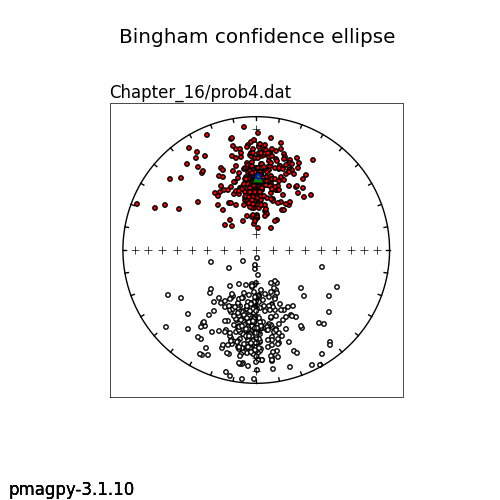

In [11]:
Image(filename='Chapter_16-prob4.dat_eq.png')

What about a reversals test?   They look pretty antipodal, but you can never tell for sure.

In [335]:
!revtest.py -h


    NAME
       revtest.py

    DESCRIPTION
       calculates bootstrap statistics to test for antipodality

    INPUT FORMAT
       takes dec/inc as first two columns in space delimited file
   
    SYNTAX
       revtest.py [-h] [command line options]
    
    OPTION
       -h prints help message and quits
       -f FILE, sets input filename on command line
       -fmt [svg,png,jpg], sets format for image output
       -sav saves the figures silently and quits
               

    


In [336]:
!revtest.py -f Chapter_16/prob4.dat -fmt png -sav

doing first mode, be patient
doing second mode, be patient
2  saved in  REV_Y.png
1  saved in  REV_X.png
3  saved in  REV_Z.png


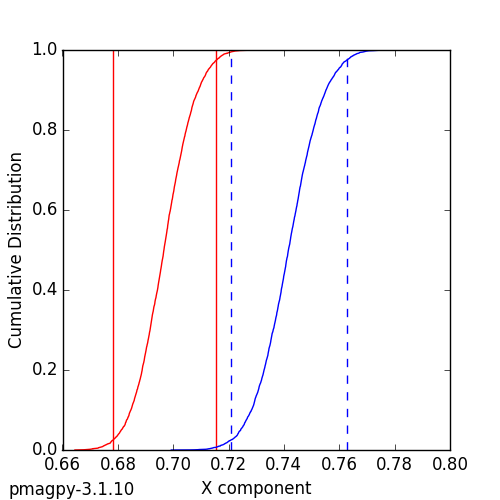

In [337]:
Image(filename='REV_X.png')

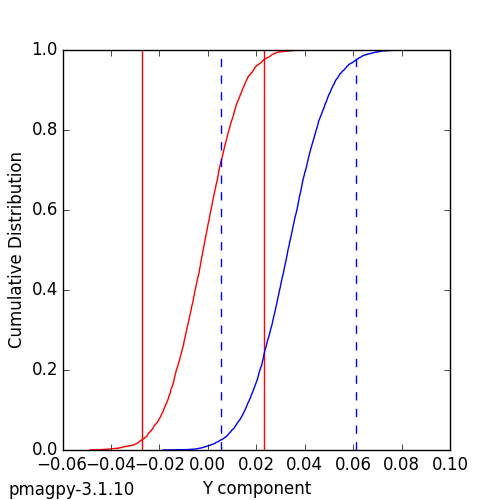

In [338]:
Image(filename='REV_Y.png')

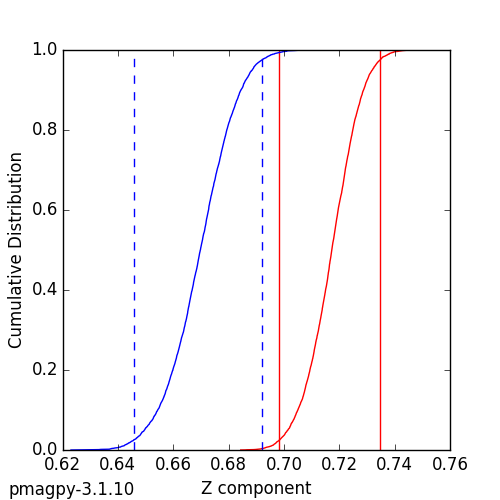

In [339]:
Image(filename='REV_Z.png')

Hmmm.  These data are NOT antipodal (both X and Z are different).  Anyway, moving on to the tk03.py thing.

In [341]:
!tk03.py -lat 41.5 > Chapter_16/tk03.out
!eqarea.py -f Chapter_16/tk03.out -fmt png -sav

1  saved in  Chapter_16-tk03.out.png


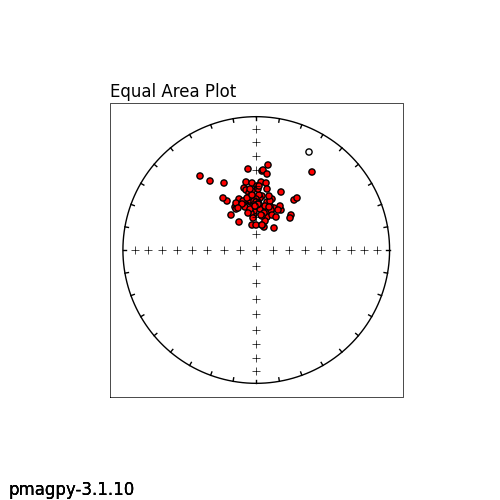

In [342]:
Image(filename='Chapter_16-tk03.out.png')

The simulated data are a lot steeper...   Inclination shallowing?  Let's try find\_EI.py

In [ ]:
!find_EI.py -f Chapter_16/prob4.dat -fmt png -sav

Bootstrapping.... be patient
25  out of  1000


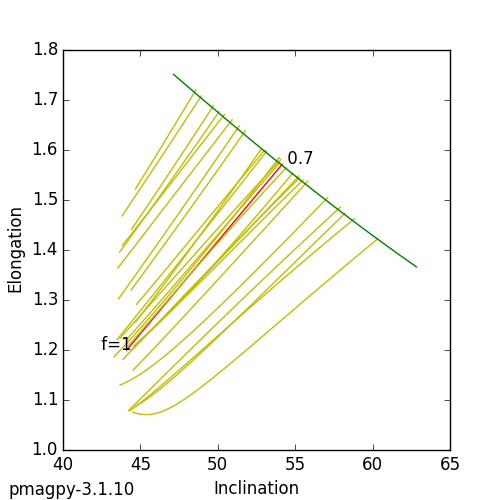

In [4]:
Image(filename='findEI_ei.png')

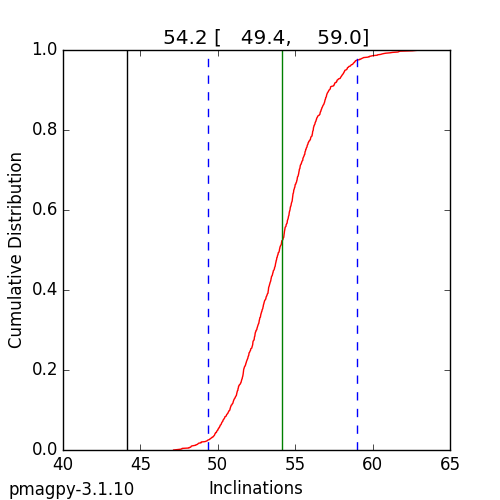

In [5]:
Image(filename='findEI_cdf.png')

One last thing.   We can use apwp.py to get the European pole for 10 and 20 Ma.

In [6]:
!apwp.py -lat 41.5 -lon 358.5 -P EU -age 10

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    10.0    37.1     2.0    56.5    85.3   158.4



In [7]:
!apwp.py -lat 41.5 -lon 358.5 -P EU -age 20

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    20.0    34.0     4.9    53.4    81.5   149.9



That find_EI.py fixed the data right up!  The original average inclination was 44$^{\circ}$ or WAY too shallow.  Now it is 54.2$^{\circ}$, which is right where it 'should' be!  Nice

## Problem 5a:

I went to the MagIC search engine (see Problem 1) and downloaded the two searches as instructed in the book.  I created the two subdirectories (DC4 and DC5) in a Project Directory called Europe. 

## Problem 5b:

Now I'll fire up QuickMagIC.py to unpack the two searchs.

In [13]:
!QuickMagIC.py

/Users/ltauxe/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:1312: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/Users/ltauxe/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


So, let's take a look at what we have by reading the two pmag_results.txt files into a Pandas DataFrame. 

In [252]:
DC4=pd.read_csv('Chapter_16/Europe/DC4/pmag_results.txt',sep='\t',header=1)
DC5=pd.read_csv('Chapter_16/Europe/DC5/pmag_results.txt',sep='\t',header=1)
poles=pd.concat([DC4,DC5])
poles.average_age_high

0      542
1     1650
2      307
3       65
4      100
5      247
6       60
7      133
8      250
9      318
10      60
11     307
12     444
13    1650
14    1650
...
103     461
104     472
105    1650
106     161
107     416
108     200
109     146
110     110
111      23
112      64
113     228
114     251
115      56
0        50
1       228
Name: average_age_high, Length: 118, dtype: int64

Some of these studies included data from outside the age bounds, so let's trim the unwanted ones.

In [286]:
poles=poles.loc[poles.average_age_low <=110.]
poles=poles.loc[poles.average_age_high >= 85]

Some of the data were included in other results, were overprints, or were otherwise superceded.  These details are in a comment field called result_description.  So let's read these descriptions and figure out how to eliminate the ones we don't want. 

In [287]:
for ind in poles.index:
    print ind, poles.loc[ind].result_description

4 AF to 60mT, thermal to 550C, characteristic component. IRM (sat. 0. 2T).
7 Thermal to 575C, AF to 100mT, characteristic component.
16 Thermal 520-540C.
22 Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
24 AF and thermal, characteristic component, 400-600C, 20-100mT. IRM, SUSC-T, 3-axis Jrs-T (MAGN). Some data from RESULTNOS 6206, 6207, 8191 are included.
30 Group 1. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST. Remagnetized in Albian-Aptian.
40 Thermal 520-540C. Data included in RESULTNO 6698. Superseded study.
41 Thermal to 580C, AF to 135mT, characteristic component. IRM (sat. 0. 2T, no sat. 2T) , SUSC (vs Temp). Mean of three localities calculated (12 sites).
44 Group 2. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST. Remagnetized in Albian-Aptian.
45 Thermal, characteristic component, 500-610C. IRM, 3-axis Jrs-T (HEM, MAGN). Late Jurassic - Early Cretaceous remagnetisation suggested.
52 Ther

The guys who constructed the GPMDB did not use a consistent terminology for describing their results, so we just have to look at the descriptionsand eliminate the kind we don't. want.  For example, if we make a list of unwanted descriptors (verprint, emagneti, Superseded, Data incl. in RESULTNOS), from the above list,  we can eliminate those. 

In [290]:
Unwanted=['verprint','emagneti','Superseded','Data incl. in RESULTNOS'] # verprint includes both Overprint and overprint
for deleteme in Unwanted:
    poles.ix[poles.result_description.str.contains(deleteme),'Use']='False'
mypoles=poles.ix[poles.Use!='False']
for ind in mypoles.index:
    print ind, mypoles.loc[ind].result_description



4 AF to 60mT, thermal to 550C, characteristic component. IRM (sat. 0. 2T).
7 Thermal to 575C, AF to 100mT, characteristic component.
16 Thermal 520-540C.
22 Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
24 AF and thermal, characteristic component, 400-600C, 20-100mT. IRM, SUSC-T, 3-axis Jrs-T (MAGN). Some data from RESULTNOS 6206, 6207, 8191 are included.
41 Thermal to 580C, AF to 135mT, characteristic component. IRM (sat. 0. 2T, no sat. 2T) , SUSC (vs Temp). Mean of three localities calculated (12 sites).
58 Thermal to 650C. Js-T (CT 100, 650C) , OP (GOETH, HEM, MAGN) , SUSC, AN. Late Cretaceous magnetization.
59 AF 35-100mT, thermal 300-640C, characteristic component. Includes data from REFNO 2670.
80 Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
84 AF to 90mT. OP (TM). Combined RESULTNO 74, 120 and 2752, unit sites. .
89 Thermal 520-540C.
96 Thermal to 560C, characteristic component. IRM (MAGN, HEM) ; SUSC; AN.
100 Mainly

I want to compare the location names of the stuff we took, versus the stuff we didn't take:

In [291]:
mypoles.er_location_names

4                          :Upper Cretaceous Limestones:
7                                       :Cismon Section:
16                    :Koryak Mesozoic Tuffs, Sediments:
22                     :Organya Aptian-Albian Sediments:
24     :Lusitanian, Algarve Basins Cretaceous Sediments:
41                                  :Apulian Limestones:
58                        :Bulgarian Jurassic Sediments:
59                                       :Scaglia Rossa:
80              :Organya Cenomanian-Coniacian Sediments:
84                    :Combined Cretaceous Sills, Dykes:
89               :Koryak Cretaceous-Paleogene Sediments:
96                     :Scaglia Formation, Marsica Area:
100                              :Capas Rojas Formation:
102                                :Lower Scaglia Rossa:
106                         :Koryak Mesozoic Ophiolites:
109                        :Lower Cretaceous Limestones:
Name: er_location_names, dtype: object

In [292]:
poles.er_location_names

4                          :Upper Cretaceous Limestones:
7                                       :Cismon Section:
16                    :Koryak Mesozoic Tuffs, Sediments:
22                     :Organya Aptian-Albian Sediments:
24     :Lusitanian, Algarve Basins Cretaceous Sediments:
30     :Organya Berriasian-Barremian Sediments, Group 1:
40                                 :Shikotan Volcanites:
41                                  :Apulian Limestones:
44     :Organya Berriasian-Barremian Sediments, Group 2:
45                              :Skaistgirys Carbonates:
52                                :Matakotanskaya Suite:
53                                :Malokurilskaya Suite:
58                        :Bulgarian Jurassic Sediments:
59                                       :Scaglia Rossa:
68                       :Shikotan Volcanites, Combined:
77            :Iberian Range Sediments, Aguaton S Comp.:
79               :Algarve Basin Aptian-Albian Sediments:
80              :Organya Cenoma

Now we have a pared down list of poles.  

## Problem 5c:

We have to use a program named pt_rot.py, so let's find out what it does.

In [297]:
!pt_rot.py -h


    NAME 
        pt_rot.py 

    DESCRIPTION
        rotates pt according to specified age and plate
 
    SYNTAX
        pt_rot.py [command line options]

    OPTIONS
        -h prints help and quits
        -f file with lon lat plate age Dplate as space delimited input
           Dplate is the destination plate coordinates desires 
           - default is "fixed south africa"
           Dplate should be one of: [nwaf, neaf,saf,aus, eur, ind, sam, ant, grn, nam]
        -ff file Efile,   file  has lat lon data file and Efile has sequential rotation poles: Elat Elon Omega 
        -F OFILE, output pmag_results formatted file with rotated points stored in vgp_lon, vgp_lat
           default is to print out rotated lon, lat to standard output
    
    


We are going to use the -ff option, so  we have to save the data in a file with these keys: vgp_lat,vgp_lon. 

In [299]:
out=np.array([mypoles.vgp_lat.values,mypoles.vgp_lon.values]).transpose()
np.savetxt('Chapter_16/mypoles.out',out)
!cat Chapter_16/mypoles.out

5.300000000000000000e+01 1.360000000000000000e+02
4.420000000000000284e+01 2.573000000000000114e+02
3.800000000000000000e+01 2.930000000000000000e+02
7.709999999999999432e+01 2.339000000000000057e+02
7.000000000000000000e+01 2.530000000000000000e+02
5.600000000000000000e+01 2.610000000000000000e+02
7.700000000000000000e+01 3.130000000000000000e+02
6.339999999999999858e+01 2.201999999999999886e+02
8.509999999999999432e+01 2.420999999999999943e+02
6.179999999999999716e+01 2.229000000000000057e+02
7.600000000000000000e+01 1.780000000000000000e+02
7.300000000000000000e+01 2.030000000000000000e+02
3.810000000000000142e+01 8.440000000000000568e+01
4.950000000000000000e+01 2.711000000000000227e+02
7.000000000000000000e+00 1.520000000000000000e+02
7.000000000000000000e+01 1.920000000000000000e+02


It's ugly, but it will do. For the next part, I put the rotation poles for Europe => Africa and Africa => North America from the Appendix in a file called Epole in the Chapter_16 directory, so let's have a look at that.

In [301]:
!cat Chapter_16/Epoles

40.2 -12.5 28.5
70 -24 -40.2


We should be all set to run pt_rot.py now:

In [302]:
!pt_rot.py -ff Chapter_16/mypoles.out Chapter_16/Epoles -F Chapter_16/mypoles.rot
!cat Chapter_16/mypoles.rot

tab 	pmag_results
vgp_lat	vgp_lon
55.8	127.4
36.0	237.2
31.7	269.9
69.1	221.0
61.8	233.1
47.9	239.9
71.7	270.9
56.1	207.3
76.9	228.4
54.4	209.2
71.9	183.6
66.7	198.3
46.0	66.8
41.7	249.0
8.2	133.7
64.8	188.1


We can plot that file using vgpmap_magic.py or ipmag.plot_vgp (as in Chapter 14).  Because we want to also plot the Besse and Courtillot (2002) pole for North America, I prefer the latter. For that, we need to import the Basemap function from mpl_toolkits (you might have to install this if you got the 'express' version of Canopy installed - it is in the Academic version though to see the PmagPy documentation).   

In [304]:
from mpl_toolkits.basemap import Basemap

Now we need to do two things:  1) read in the file mypoles.rot and 2) figure out what the pole for North America was.  First the latter.  I can use the program apwp.py for this, but I have to put in dummy lat and lon keys and ignore the Paleolat, Dec, Inc output and zoom in on the Pole_lat Pole_long output. 

In [307]:
!apwp.py -lat 33 -lon -117 -P NA -age 100

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
   100.0    38.8   352.4    58.1    81.5   198.3



So the North American pole was 81.5N/198.3E at 100 Ma.

In [308]:
NApole_lat,NApole_lon=81.5, 198.3

Read in the data from mypoles.rot as a DataFrame. Mypoles.rot is a regular MagIC formated file, so we know what to do by now:

In [310]:
rot_poles=pd.read_csv('Chapter_16/mypoles.rot',sep='\t',header=1)

And we plot the stuff:  

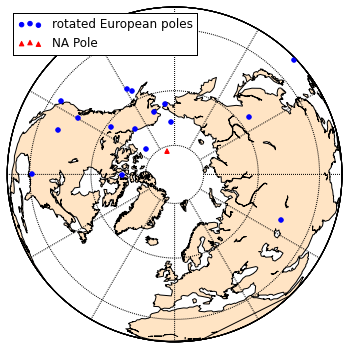

In [312]:
m=Basemap(projection='ortho',lat_0=90,lon_0=0,resolution='c')
plt.figure(num=3,figsize=(6,6))
m.drawcoastlines()
m.fillcontinents(color='bisque')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-60,90,30))
ipmag.plot_vgp(m,rot_poles['vgp_lon'].tolist(),rot_poles['vgp_lat'].tolist(),\
               color='b',label='rotated European poles',legend='yes')
ipmag.plot_vgp(m,[NApole_lon],[NApole_lat], color='r',\
               label='NA Pole',marker='^',legend='yes')

Boy that is super crappy agreement!  The European poles are pretty scattered and are all 'far sided'.  A lot of them are sediments.  I wonder whether we have an 'inclination shallowing' problem.  You can't tell because we only have the poles - not the original data.  So someone should get to work on this problem. 

## Problem 5d:

For this we need the blessed cont_rot.py.  So first, let's take it out for a spin.

In [313]:
!cont_rot.py -h


    NAME 
        cont_rot.py 

    DESCRIPTION
        rotates continental fragments according to specified Euler pole
 
    SYNTAX
        cont_rot.py [command line options]

    OPTIONS
        -h prints help and quits
        -con [af, congo, kala, aus, balt, eur, ind, sam, ant, grn, lau, nam, gond] , specify colon delimited list of continents to be displayed, e.g., af, af:aus], etc
        -age use finite rotations of Torsvik et al. 2008 for specific age (5 Ma increments <325Ma)
             rotates to paleomagnetic reference frame 
             available conts: [congo kala aus eur ind sam ant grn nam]
        -sac include rotation of south african craton to pmag reference
        -sym [ro, bs, g^, r., b-, etc.] [1,5,10] symbol and size for continent
           colors are r=red,b=blue,g=green, etc.
           symbols are '.' for points, ^, for triangle, s for square, etc.
            -, for lines, -- for dotted lines, see matplotlib online documentation for plot()
        -eye  E

Well that's intimidating....   but we forge on. 

In [315]:
!cont_rot.py -con af:eur:nam:sam:ind:aus:ant -age 100 -prj moll -sym k. 1 -sav -fmt png

1  saved in  Cont_rot.png


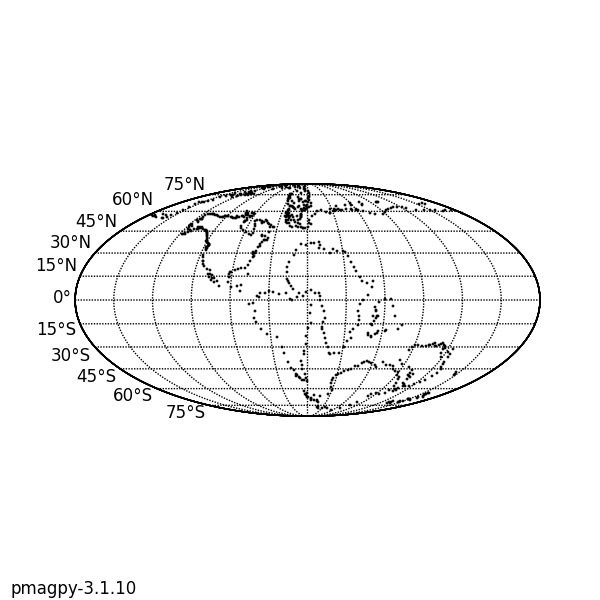

In [316]:
Image(filename='Cont_rot.png')

That is pretty ugly.  We can do it in higher resolution if we have the patience:  

In [317]:
!cont_rot.py -con af:eur:nam:sam:ind:aus:ant -age 100 -prj moll -sym k. 1 -sav -fmt png -res i

this resolution will take a while - be patient
1  saved in  Cont_rot.png


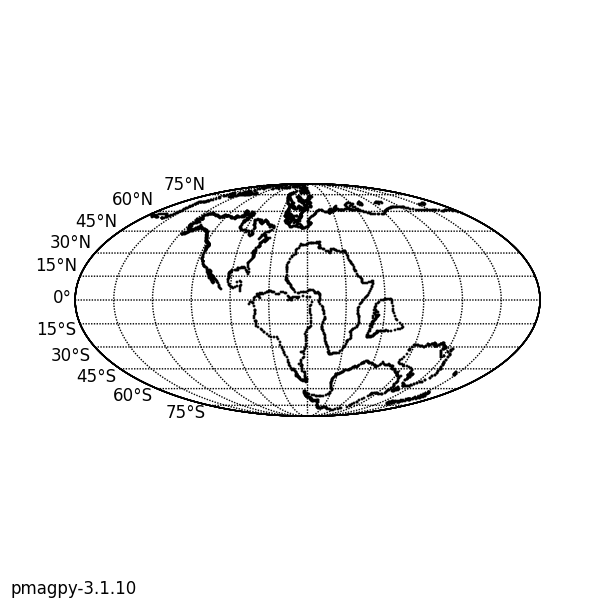

In [318]:
Image(filename='Cont_rot.png')

Well, it is better.  We really should be using GPlates, which is beautiful and very functional, but for the purpose of learning about these things, this approach is fine.